## Making 2D KDE plots of spot temp vs. filling factor

N. Gosnell July 5, 2018

We might wants plots of spot temp vs. filling factor for the Cool Stars talk and/or the paper. Let's give this a try...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Order 109 looks interesting based on the batch emcee results, so let's start there.

In [4]:
ws = np.load("../sf/m109/output/mix_emcee/run01/emcee_chain.npy")

In [5]:
burned = ws[:, 2500:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [6]:
f_omega = 10**fc[:, 7] / (10**fc[:, 5] + 10**fc[:,7])

/Users/ngosnell/anaconda3/envs/astroconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


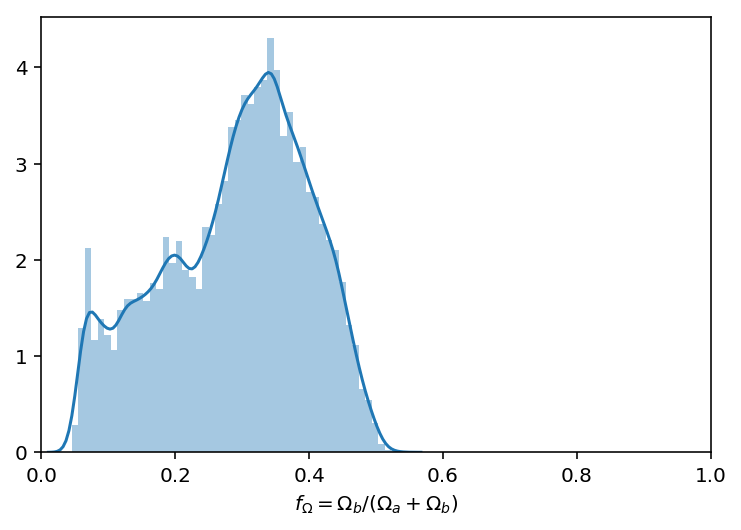

In [8]:
sns.distplot(f_omega)
plt.xlabel('$f_{\Omega} = \Omega_b/(\Omega_a + \Omega_b)$')
plt.xlim(0, 1);

Text(0,0.5,'$T_{\\mathrm{eff, 2}}$')

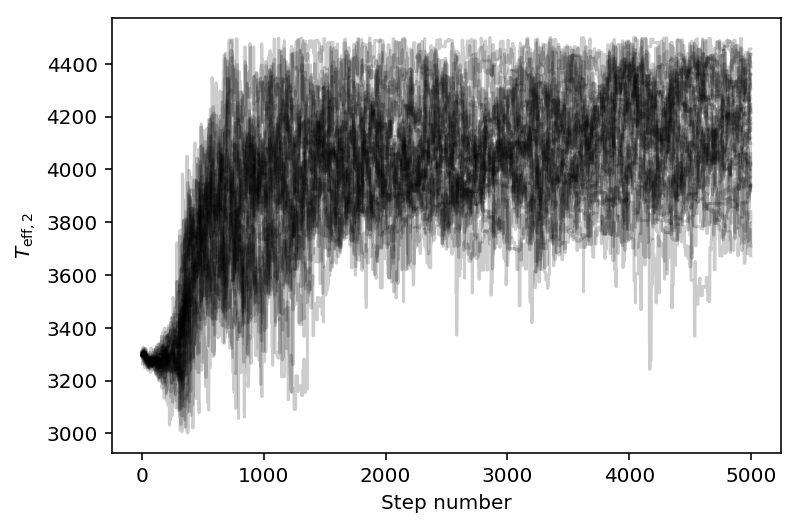

In [13]:
plt.plot(ws[:, :, 6].T, color="k", alpha=0.2)
plt.xlabel("Step number")
plt.ylabel("$T_{\mathrm{eff, 2}}$")

We only want the last 2500 steps of $T_{\mathrm{eff, 2}}$ to compare against the burned-in filling factor.

In [25]:
burnedT2 = ws[:, 2500:, 6] 
burnedT2.shape
Txs, Tys = burnedT2.shape
T2 = burnedT2.reshape(Txs*Tys)
T2.shape

(100000,)

In [27]:
f_omega.shape

(100000,)

In [ ]:
sns.kdeplot(f_omega, T2)
plt.xlabel("Filling factor")
plt.ylabel("Spot temperature (K)");

Cool!